Requerimientos:
* biopython
* xmltodict
* matplotlib

In [2]:
def GetSeq(code):
    from Bio import SeqIO
    from Bio import ExPASy
    from Bio import SwissProt
    handle = ExPASy.get_sprot_raw(code)
    protein = SwissProt.read(handle)
    seq = protein.sequence
    print(protein.entry_name)
    return seq

GetSeq("P11166")

GTR1_HUMAN


'MEPSSKKLTGRLMLAVGGAVLGSLQFGYNTGVINAPQKVIEEFYNQTWVHRYGESILPTTLTTLWSLSVAIFSVGGMIGSFSVGLFVNRFGRRNSMLMMNLLAFVSAVLMGFSKLGKSFEMLILGRFIIGVYCGLTTGFVPMYVGEVSPTALRGALGTLHQLGIVVGILIAQVFGLDSIMGNKDLWPLLLSIIFIPALLQCIVLPFCPESPRFLLINRNEENRAKSVLKKLRGTADVTHDLQEMKEESRQMMREKKVTILELFRSPAYRQPILIAVVLQLSQQLSGINAVFYYSTSIFEKAGVQQPVYATIGSGIVNTAFTVVSLFVVERAGRRTLHLIGLAGMAGCAILMTIALALLEQLPWMSYLSIVAIFGFVAFFEVGPGPIPWFIVAELFSQGPRPAAIAVAGFSNWTSNFIVGMCFQYVEQLCGPYVFIIFTVLLVLFFIFTYFKVPETKGRTFDEIASGFRQGGASQSDKTPEELFHPLGADSQV'

In [3]:
# http://njohner.github.io/ost_pymodules/_modules/hydrophobicity.html

# Refence:
#   Eisenberg D., Schwarz E., Komarony M., Wall R.
#   J. Mol. Biol. 179:125-142(1984).
ei = {
    'A':  0.620, 'R': -2.530, 'N': -0.780, 'D': -0.900, 'C':  0.290,
    'Q': -0.850, 'E': -0.740, 'G':  0.480, 'H': -0.400, 'I':  1.380,
    'L':  1.060, 'K': -1.500, 'M':  0.640, 'F':  1.190, 'P':  0.120,
    'S': -0.180, 'T': -0.050, 'W':  0.810, 'Y':  0.260, 'V':  1.080,
}

# Kyte & Doolittle index of hydrophobicity
kd = { 'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }

# Color por propiedad
aac = { 'A': "green",'R': "red",'N':"purple",'D':"blue",'C': "orange",
       'Q':"purple",'E':"blue",'G':"orange",'H':"red",'I': "green",
       'L': "green",'K':"red",'M': "green",'F': "olive",'P':"orange",
       'S':"purple",'T':"purple",'W':"olive",'Y':"olive",'V': "green" }


def hydrophobicity(sequence, average=False, scale=ei):
    """
    Get total (or average) residual hydrophobicity of the sequence
    """
    sequence = sequence.upper()
    nof = 0
    hydrophobicity = 0
    for c in sequence:
        if c in scale:
            hydrophobicity += scale[c]
            nof += 1
    if average:
        hydrophobicity /= float(nof)
    return hydrophobicity

def momenthydrof(sequence, average=False, scale=ei):
    """
    Get total (or average) residual moment hydrophobicity of the sequence
    """
    import numpy as np
    sequence = sequence.upper()
    nof = 0
    mhydrophobicity = 0
    angulo=100
    
    senos = []
    cosenos = []
    for i,c in enumerate(sequence):
        y = scale[c]*np.sin((i*100)*np.pi/180)
        x = scale[c]*np.cos((i*100)*np.pi/180)
        senos.append(y)
        cosenos.append(x)
        nof += 1
    mhydrophobicity =  ((np.add.reduce(senos))**2 + (np.add.reduce(cosenos))**2)**0.5
    yvector = np.add.reduce(senos)
    xvector = np.add.reduce(cosenos)
    if average:
        mhydrophobicity /= float(nof)
    return mhydrophobicity, xvector, yvector

In [4]:
%matplotlib inline
# PLOT Helix
seq = "LALALALKSLHSHKSHAAAHSHWHWAAAAAAAA"
hf  = hydrophobicity(seq, average=True)
mhf, xvector, yvector = momenthydrof(seq, average=True)
print (mhf, xvector, yvector)

0.0221393529141 -0.714108360241 -0.154349057701


In [5]:
def plot_helix(sequence, start, name, az=60, ay=60, center=(0,0), helix=1):
    import pylab
    import numpy as np
    import matplotlib.transforms as mtransforms
    import matplotlib.patches as mpatch
    from matplotlib.collections import PatchCollection

    #Process
    hf  = hydrophobicity(sequence, average=True)
    mhf, xvector, yvector = momenthydrof(sequence, average=True)

    fig2, ax1 = pylab.subplots(figsize=(10,10), dpi=200, facecolor='w', edgecolor='k')

    styles = mpatch.BoxStyle.get_styles()
    stylename = sorted(styles)[0]
    spacing = 1.2
    figheight = (spacing * len(styles) + .5)
    fontsize = 0.3 * 64

    radius = 6.0
    theta = 0
    x = []; y = []
    #patches = []
    radiocircunferencia = 1.5
    j = 0
    for i in range(len(sequence)):
        if i%18 == 0:
            radius += 4
            #j = 0
        else:
            j += i
        theta += 100
        x1 = radius*np.cos(theta*np.pi/180)+center[0]
        #x2 = (radius+(radius*0.1))*np.cos(theta*np.pi/180)
        x.append(x1)
        y1 = radius*np.sin(theta*np.pi/180)+center[1]
        #y2 = (radius+(radius*0.1))*np.sin(theta*np.pi/180)
        y.append(y1)
        
        ax1.text(x1, y1+0.5, sequence[i]+str(i+start),
                ha="center",
                size=fontsize)
                #transform=ax1.transFigure,
                #bbox=dict(boxstyle=stylename, fc="w", ec="k"))
                
        
        #Circulo con radio variante
        circulo = mpatch.Circle((x1,y1+1), radius=radiocircunferencia+(0.002*j), alpha=0.6, color=aac[sequence[i]])
        ax1.add_patch(circulo)
        
        
    #print (x,y)
    ax1.plot(x,y, alpha=0.2)

    ax1.text(0, 0, "Helix %02d"%helix,
                ha="center",
                va="center",
                size=fontsize*0.8,
                #transform=ax1.transFigure,
                bbox=dict(boxstyle=stylename, fc="w", ec="k"))
    ax1.arrow(0, 0, xvector, yvector, head_width=1, head_length=(mhf*10)+3, fc='k', ec='k')

    # Agregar cinrculo inside
    circle1 = mpatch.Circle((0+center[0], 0+center[1]), 6, color='r', alpha=0.2)
    ax1.add_patch(circle1)

    ax1.text(13, 16, "xhydrof: %4.3f\nmhydrof: %4.3f" % (hf,mhf),
                ha="center",
                va="center",
                size=fontsize*0.6,
                #transform=ax1.transFigure,
                bbox=dict(boxstyle=sorted(styles)[4], fc="w", ec="k", alpha=0.2))

    pylab.savefig('%s_helix_%2d.png'%(name,helix), dpi=65)

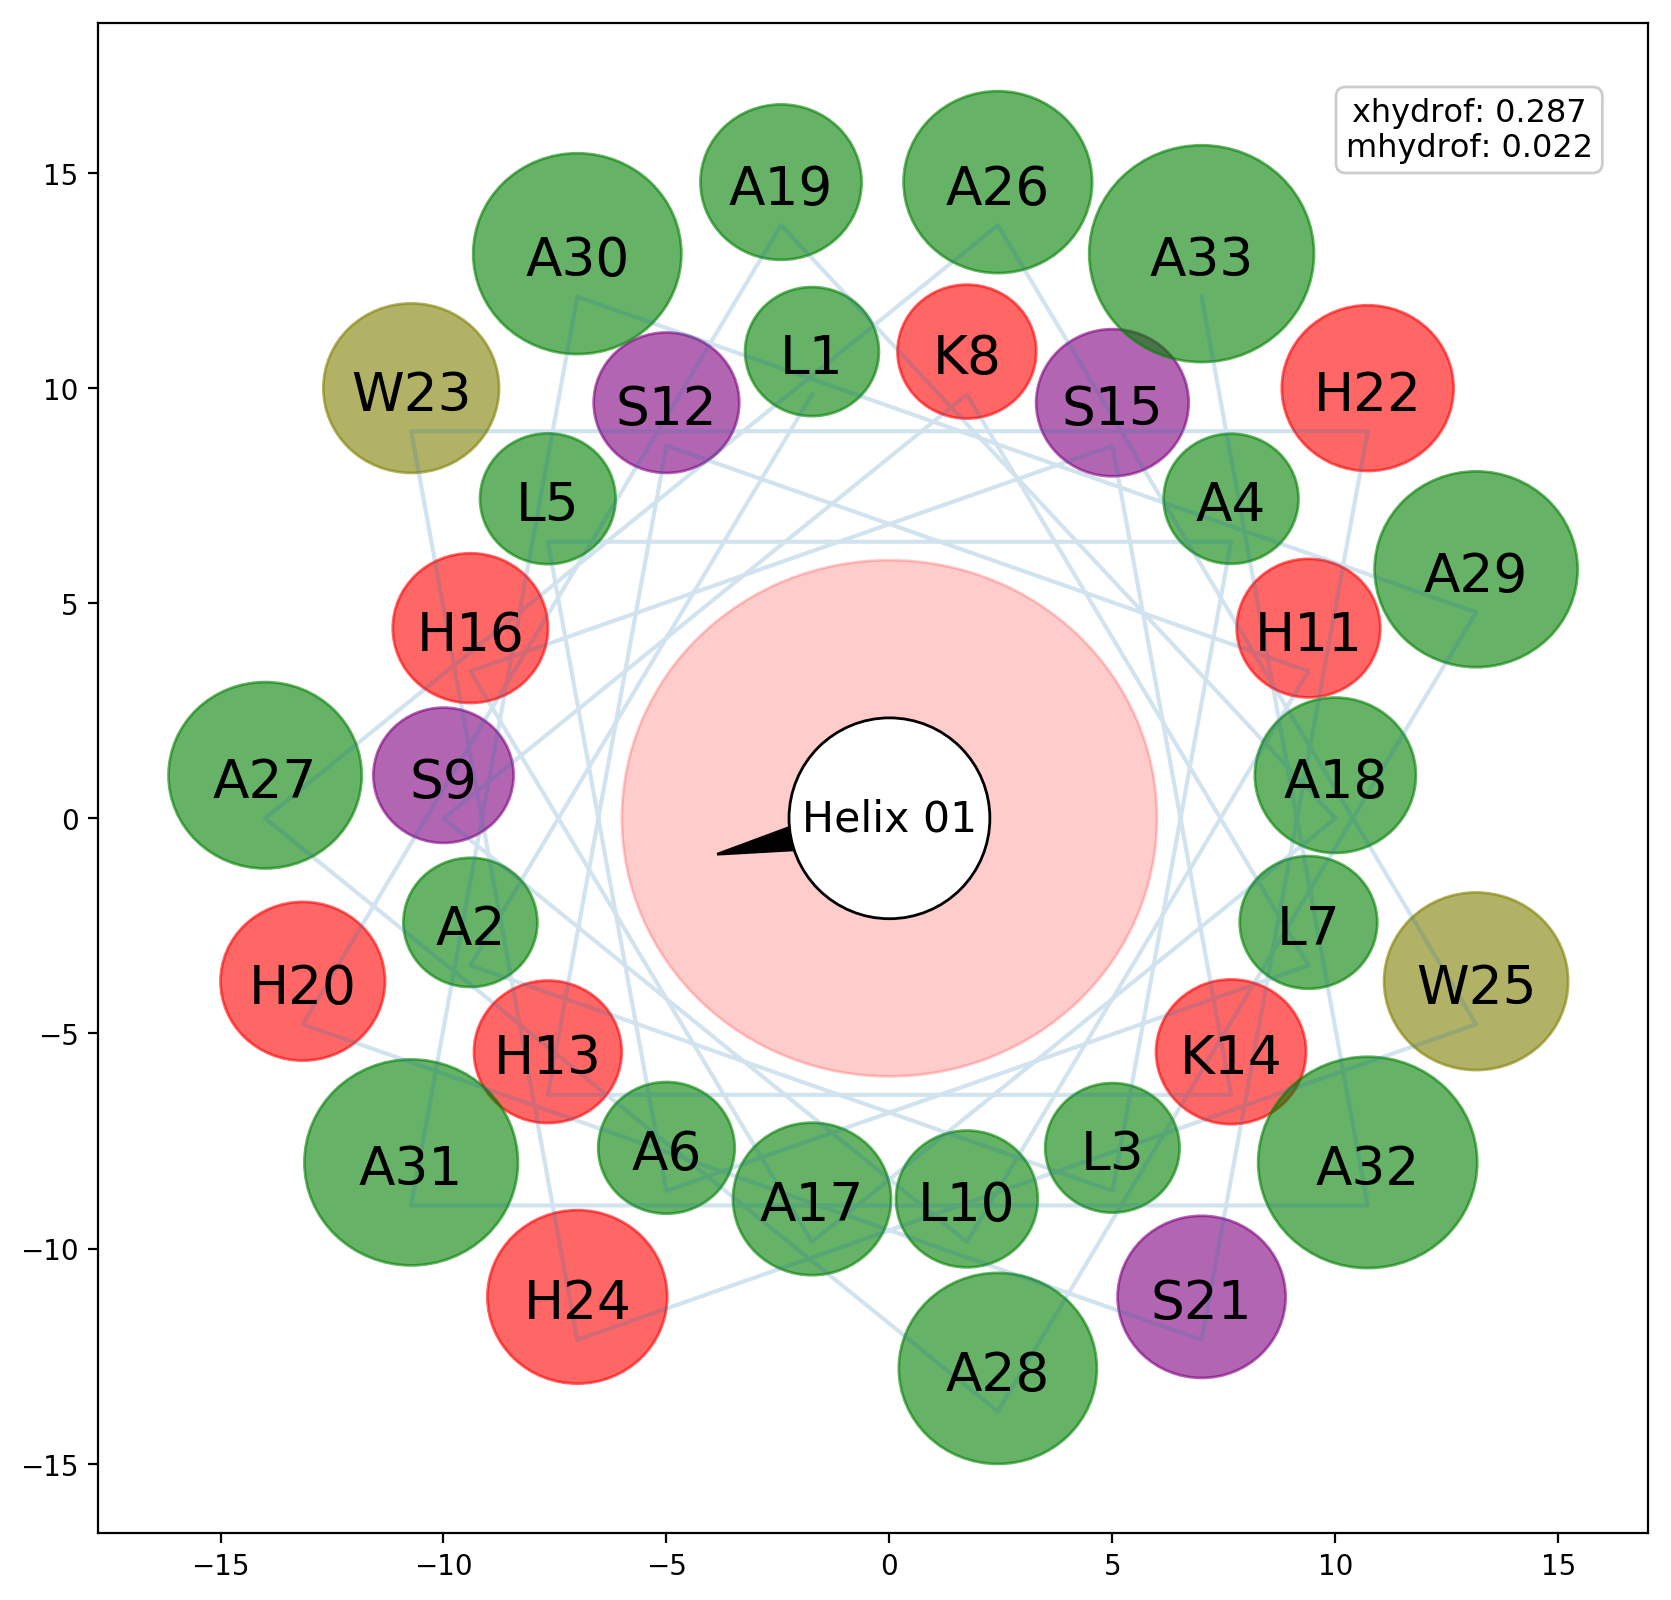

In [6]:
plot_helix(seq, start=1, name="helix", az=60, ay=60, center=(0,0), helix=1)

# PDBTM 
para reconocer los STM del PDB Identificado

In [4]:
#Running one time
xmlfile1 = "pdbtmall.xml"
xmlfile2 = "pdbtmall_ok.xml"

with open(xmlfile1, "r") as f:
    with open(xmlfile2, "w") as f2:
        xml = f.readlines()
        for l in xml:
            if l.startswith("<?xml version="):
                pass
            else:
                f2.write(l)

import xmltodict
with open(xmlfile2) as fd:
    doc = xmltodict.parse(fd.read())

In [2]:
-

In [10]:
PDBTM("4yb9")

>Single chain


{'PDBTM_pdb': {'Method': 'PDBTM_pdb',
  'Topology': ['28-42',
   '72-88',
   '104-119',
   '127-143',
   '167-182',
   '194-209',
   '284-301',
   '316-332',
   '348-363',
   '375-393',
   '417-434',
   '441-454']},
 'PDBTM_seq': {'Method': 'PDBTM_seq',
  'Topology': ['28-42',
   '72-88',
   '104-119',
   '127-143',
   '167-182',
   '194-209',
   '284-301',
   '316-332',
   '348-363',
   '375-393',
   '417-434',
   '441-454']}}

In [568]:
#ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)

In [7]:
def get_helix_distances(pdb_code = "4yb9", cutoff=3.0):
    import prody as pd
    # Get the pdb file
    pdb_file = pd.fetchPDB(pdb_code)
    top_dict = PDBTM(pdb_code)
    
    #Read the pdb file
    protein = pd.parsePDB(pdb_file)
    
    #Obtain the topology
    topology = top_dict["PDBTM_seq"]["Topology"]
    
    #get the helices selection
    helices = []
    for i,helix in enumerate(topology):
        start,end = helix.split("-")
        h = protein.select("resnum %s to %s"% (start, end)) 
        helices.append(h)
    
    positive_res = ["LYS","ARG","HIS"]
    positive_atm = ["NH1","NH2","ND1","NE2"]
    negative_res = ["ASP","GLU"]
    negative_atm = ["OE1","OE2", "OD1","OD2"]
    
    
    #get the interactions 
    from itertools import combinations
    pares = combinations(helices, 2)
    dict_interact_atom = {}
    dict_interact_res = {}
    for i,par in enumerate(pares):
        print ("Analizing par %02d"%i)
        for atom1 in par[0]:
            for atom2 in par[1]:
                dist = pd.calcDistance(atom1,atom2)
                if dist < cutoff:
                    str_atom1 = "%s%03d%s" % (atom1.getResname(), atom1.getResnum(), atom1.getName())
                    str_atom2 = "%s%03d%s" % (atom2.getResname(), atom2.getResnum(), atom2.getName())
                    #print ("%s-%s:%4.2f" % (str_atom1, str_atom2, dist))
                    dict_interact_atom["%s-%s"%(str_atom1, str_atom2)]=dist
                    res_par = "%s%03d-%s%03d" % (atom1.getResname(), atom1.getResnum(), atom2.getResname(), atom2.getResnum())
                    if res_par in dict_interact_res.keys():
                        dict_interact_res[res_par] = dict_interact_res[res_par]+1
                    else:
                        dict_interact_res[res_par] = 1
                if atom1.getResname() in positive_res and atom1.getName() in positive_atm and atom2.getResname() in negative_res and atom2.getName() in negative_atm and dist < 4:
                    str_atom1 = "%s%03d%s" % (atom1.getResname(), atom1.getResnum(), atom1.getName())
                    str_atom2 = "%s%03d%s" % (atom2.getResname(), atom2.getResnum(), atom2.getName())
                    print ("%s-%s:%4.2f" % (str_atom1, str_atom2, dist))
                if atom2.getResname() in positive_res and atom2.getName() in positive_atm and atom1.getResname() in negative_res and atom1.getName() in negative_atm and dist < 4:
                    str_atom1 = "%s%03d%s" % (atom1.getResname(), atom1.getResnum(), atom1.getName())
                    str_atom2 = "%s%03d%s" % (atom2.getResname(), atom2.getResnum(), atom2.getName())
                    print ("%s-%s:%4.2f" % (str_atom1, str_atom2, dist))
                    
    print(dict_interact_res)
    print(dict_interact_atom)
        

In [8]:
#ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
get_helix_distances("1pv6")

@> PDB file is found in working directory (1pv6.pdb.gz).
@> 6580 atoms and 1 coordinate set(s) were parsed in 0.06s.


>Single chain
Analizing par 00
Analizing par 01
Analizing par 02
Analizing par 03
Analizing par 04
Analizing par 05
Analizing par 06
Analizing par 07
Analizing par 08
Analizing par 09
Analizing par 10
Analizing par 11
Analizing par 12
Analizing par 13
Analizing par 14
Analizing par 15
Analizing par 16
Analizing par 17
Analizing par 18
Analizing par 19
Analizing par 20
Analizing par 21
Analizing par 22
Analizing par 23
Analizing par 24
Analizing par 25
Analizing par 26
Analizing par 27
Analizing par 28
Analizing par 29
Analizing par 30
GLU126OE2-ARG144NH1:3.95
Analizing par 31
Analizing par 32
Analizing par 33
Analizing par 34
Analizing par 35
Analizing par 36
Analizing par 37
Analizing par 38
Analizing par 39
Analizing par 40
Analizing par 41
Analizing par 42
Analizing par 43
Analizing par 44
Analizing par 45
Analizing par 46
Analizing par 47
Analizing par 48
Analizing par 49
Analizing par 50
Analizing par 51
Analizing par 52
ASP240OD1-ARG302NH2:3.69
ASP240OD1-ARG302NH2:3.65
Analizing 

In [ ]:
# 

In [496]:
dict3to1 = {'ALA':'A','CYS':'C','ASP':'D','GLU':'E','PHE':'F','GLY':'G','HIS':'H','ILE':'I',
            'LYS':'K','LEU':'L','MET':'M','ASN':'N','PRO':'P','GLN':'Q','ARG':'R','SER':'S',
            'THR':'T','VAL':'V','TRP':'W','TYR':'Y'}

def pdb2fasta(codepdb, pdbfile=False):
    import prody as pd
    if pdbfile is False:
        pdb_file = pd.fetchPDB(codepdb, folder='/Users/alsalas/pdbfiles', compressed=False)
    if pdbfile is True:
        pdb_file = codepdb
    
    #Obtain Chains
    pdb = pd.parsePDB(pdb_file)
    cadenas = []
    for c in pdb.iterChains():
        cadenas.append(c.getChid())
        
    pdb = pd.parsePDB(pdb_file, chain=cadenas[0])
    pd.writePDB("%s_%s.pdb"% (codepdb,cadenas[0]), pdb)
    alpha_carbons = pdb.select('calpha')
    #Select residues in pdb file and write fasta file
    Resnames = alpha_carbons.getResnames()
    sequence = ""
    pdb_fasta = open('%s_%s.fasta' % (codepdb,cadenas[0]), 'w')
    for res in Resnames:
        sequence += dict3to1[res]
    str_pdb_fasta = '>'+ codepdb + ':'+cadenas[0] + '\n' + sequence + '\n'
    pdb_fasta.write(str_pdb_fasta)
    pdb_fasta.close()
    return sequence

def opm2pdb(code):
    """Obtain opm file and chain molecule"""
    import os
    # Check pdb code
    code = code.lower()
    if code[-4:] == ".pdb":
        code = code[:-4]
    
    # Download opm file
    import wget
    url = "http://opm.phar.umich.edu/pdb/%s.pdb" % code
    out = "%s_opm.pdb"%code
    wget.download(url, out=out)

    # Select the chain
    import prody as pd
    from numpy import ones, zeros
    #Obtain Chains
    pdb = pd.parsePDB(out)
    cadenas = []
    for c in pdb.iterChains():
        cadenas.append(c.getChid())
    #Obtain only PDB with first chain
    pdb = pd.parsePDB(out, chain=cadenas[0])
    #move to origin
    print (pd.calcCenter(pdb).round(3))
    pd.moveAtoms(pdb, to=zeros(3))
    print (pd.calcCenter(pdb).round(3))
    pd.writePDB("%s_opm%s.pdb" % (code,cadenas[0]), pdb)

    return out, "%s_opm%s.pdb" % (code,cadenas[0])

In [493]:
dict3to1 = {'ALA':'A','CYS':'C','ASP':'D','GLU':'E','PHE':'F','GLY':'G','HIS':'H','ILE':'I',
            'LYS':'K','LEU':'L','MET':'M','ASN':'N','PRO':'P','GLN':'Q','ARG':'R','SER':'S',
            'THR':'T','VAL':'V','TRP':'W','TYR':'Y'}

def do_plots(pdbcode):
    #obtain sequences, start
    fullopm,chainopm = opm2pdb(pdbcode)
    sequence = pdb2fasta(chainopm, pdbfile=True)
    dict_tms = PDBTM(pdbcode)
    
    sequences = []
    starts    = []
    centers   = []
    counter   = 0
    insides   = []
    sangles   = []
    dangles   = []
    
    for tm in dict_tms['PDBTM_pdb']['Topology']:
        start, end = tm.split("-")
        #stm = sequence[int(start):int(end)+1]     
        #sequences.append(stm)
        starts.append(int(start))
        helix = (int(start),int(end)+1)
        sequence, centerx, centery, sangle, dangle, dangle2, inside = AlignxyHelix(chainopm, helix)
        sequences.append(sequence)
        # Ajust the helix sparse
        centers.append((centerx*15,centery*15))
        insides.append(inside)
        sangles.append(sangle)
        dangles.append((dangle,dangle2))
        counter += 1
        if counter == 20:
            print("More of 20 helix is rare")
            break
                      
    import pylab
    
    fig2, ax1 = pylab.subplots(figsize=(30,25), dpi=200, facecolor='w', edgecolor='k')
    
    for i,sequence in enumerate(sequences):
        az, ay = dangles[i]
        plot_helix(sequence, ax1, insides[i], starts[i], sangles[i], az, ay, center=centers[i], helix=i+1)
            
    #fig2.tight_layout()
    ax1.set_xlim((-360,360))
    ax1.set_ylim((-300,300))
    
    pylab.savefig('%s.png'%(pdbcode), dpi=200)
    return
    
def AlignxyHelix(pdbname, helix):
    import prody as pd
    import numpy as np
    # Obtain coord and masses
    modelpdb = pd.parsePDB(pdbname)
    calpha   = modelpdb.select('protein and ca resnum %d:%d'%helix)
    xyz = calpha.getCoords()
    masses = calpha.getMasses()
    Resnames = calpha.getResnames()
    sequence = ""
    for res in Resnames:
        sequence += dict3to1[res]
                             
    # Obtain Inertia matrix
    I = calc_principalaxes(xyz, masses)
    #plot_vector(xyz, I)
    M, dangle = orient(xyz, masses, I[2], [0,0,1])
    #plot_vector(xyz, M[:3])
    xyz2 = move(xyz, M)
    
    I2 = calc_principalaxes(xyz2, masses)
    #plot_vector(xyz2, I2)
    M2, dangle2 = orient(xyz2, masses, I2[1], [0,1,0])
    #plot_vector(xyz2, M2[:3])
    xyz3 = move(xyz2, M2)
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    
    if z[0] > z[-1]:
        inside = 1
        sangle = np.arctan2(xyz[0,0],xyz[0,1])
    if z[0] < z[-1]:
        inside = -1
        sangle = np.arctan2(xyz[-1,0],xyz[-1,1])

    print(np.average(x), np.average(y), sangle, dangle, dangle2, inside)
    return sequence, np.average(xyz[:,0]), np.average(xyz[:,1]), sangle, dangle, dangle2, inside

def plot_helix(sequence, ax1, inside=0, start=1, angle_start=0, az=60, ay=60, center=(0,0), helix=1):
    import matplotlib.patches as mpatch
    import numpy as np
    #import matplotlib.transforms as mtransforms
    #from matplotlib.collections import PatchCollection
    styles = mpatch.BoxStyle.get_styles()
    stylename = sorted(styles)[0]
    spacing = 1.2
    figheight = (spacing * len(styles) + .5)
    fontsize = 5

    #Process
    hf  = hydrophobicity(sequence, average=True)
    mhf, xvector, yvector = momenthydrof(sequence, average=True)
    radius = 6.0*3
    theta = 0 + angle_start*180/np.pi
    radiocircunferencia = 1.5*2
    j = 0
    x = []; y = []
    #patches = []
    if inside == 1:
    
        for i in range(len(sequence)):
            if i%18 == 0:
                radius += 4*1.8
                #j = 0
            else:
                j += i
            theta += 100
            x1 = radius*np.cos(theta*np.pi/180)+center[0]
            #x2 = (radius+(radius*0.1))*np.cos(theta*np.pi/180)
            x.append(x1)
            y1 = radius*np.sin(theta*np.pi/180)+center[1]
            #y2 = (radius+(radius*0.1))*np.sin(theta*np.pi/180)
            y.append(y1)

            ax1.text(x1, y1+0.5, sequence[i]+str(i+start),
                    ha="center",
                    size=fontsize)
                    #transform=ax1.transFigure,
                    #bbox=dict(boxstyle=stylename, fc="w", ec="k"))


            #Circulo con radio variante
            circulo = mpatch.Circle((x1,y1+1), radius=radiocircunferencia+(0.009*j), alpha=0.8, color=aac[sequence[i]])
            ax1.add_patch(circulo)

    if inside == -1:
        for i in range(len(sequence)):
            if i%18 == 0:
                radius += 4*1.8
                #j = 0
            else:
                j += i
            theta -= 100
            x1 = radius*np.cos(theta*np.pi/180)+center[0]
            #x2 = (radius+(radius*0.1))*np.cos(theta*np.pi/180)
            x.append(x1)
            y1 = radius*np.sin(theta*np.pi/180)+center[1]
            #y2 = (radius+(radius*0.1))*np.sin(theta*np.pi/180)
            y.append(y1)
            
            ax1.text(x1, y1+0.5, sequence[::-1][i]+str(start+len(sequence)-i),
                    ha="center",
                    size=fontsize)
                    #transform=ax1.transFigure,
                    #bbox=dict(boxstyle=stylename, fc="w", ec="k"))


            #Circulo con radio variante
            circulo = mpatch.Circle((x1,y1+1), radius=radiocircunferencia+(0.009*j), alpha=0.8, color=aac[sequence[i]])
            ax1.add_patch(circulo)
        
    #print (x,y)
    ax1.plot(x,y, alpha=0.2)

    ax1.text(0+center[0], 0+center[1], "Helix %02d"%helix,
                ha="center",
                va="center",
                size=fontsize*0.8,
                #transform=ax1.transFigure,
                bbox=dict(boxstyle=stylename, fc="w", ec="k"))
    
    ax1.text(0+center[0], -10+center[1], "xhydrof: %4.3f\nmhydrof: %4.3f\naz-ay: %03dº,%03dº" % (hf,mhf,az,ay),
                ha="center",
                va="center",
                size=fontsize*0.6,
                #transform=ax1.transFigure,
                bbox=dict(boxstyle=sorted(styles)[4], fc="w", ec="k", alpha=1))
    
    ax1.arrow(0+center[0], 0+center[1], xvector, yvector, head_width=1, head_length=(mhf*10)+3, fc='k', ec='k')

    # Agregar cinrculo to first residue
    circle2 = mpatch.Circle((x[0], y[0]+1), 3.5, color='r', alpha=0.4)
    ax1.add_patch(circle2)
    
    # Agregar cinrculo inside
    if inside >= 0:
        circle1 = mpatch.Circle((0+center[0], 0+center[1]), 15.0, color='r', alpha=0.1)
        ax1.add_patch(circle1)
    if inside < 0:
        circle1 = mpatch.Circle((0+center[0], 0+center[1]), 15.0, color='b', alpha=0.1)
        ax1.add_patch(circle1)

    return

@> WARNING failed to parse occupancy at line 3491
@> WARNING failed to parse beta-factor at line 3491
@> WARNING failed to parse occupancy at line 3492
@> WARNING failed to parse beta-factor at line 3492
@> WARNING failed to parse occupancy at line 3493
@> WARNING failed to parse beta-factor at line 3493
@> WARNING failed to parse occupancy at line 3494
@> WARNING failed to parse beta-factor at line 3494
@> WARNING failed to parse occupancy at line 3495
@> WARNING failed to parse beta-factor at line 3495
@> WARNING failed to parse occupancy at line 3496
@> WARNING failed to parse beta-factor at line 3496
@> WARNING failed to parse occupancy at line 3497
@> WARNING failed to parse beta-factor at line 3497
@> WARNING failed to parse occupancy at line 3498
@> WARNING failed to parse beta-factor at line 3498
@> WARNING failed to parse occupancy at line 3499
@> WARNING failed to parse beta-factor at line 3499
@> WARNING failed to parse occupancy at line 3500
@> WARNING failed to parse beta-

[ 1.75  0.98 -3.88]
[-0.  0.  0.]


@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.


>Single chain
Calculating principal axes.
Getting the center-of-mass...
Total weight: 276.00
(8.1333043478260869, -4.3886521739130435, 2.0064347826086957)
Computing the inertia tensor...
[[ 23840.69060243   2933.34253722  12204.59209252]
 [  2933.34253722  29920.28448626  -4348.35720626]
 [ 12204.59209252  -4348.35720626  10271.77188104]]
Drawing the principal components...
[[ 0.48041325 -0.75354697  0.44874278]
 [-0.72052414 -0.63082525 -0.28793136]
 [ 0.50004808 -0.18500396 -0.84600559]]
Total weight: 276.00
(8.1333043478260869, -4.3886521739130435, 2.0064347826086957)
[ 0.50004808 -0.18500396 -0.84600559]
[ 0.  0.  1.]
Angulo de rot (rad): 2.57924472237
Angulo de rot (deg): 147.779836923
[[ -0.62374774   0.60074178  -0.50004808  16.84619509]
 [  0.60074178   0.77774215   0.18500396  -6.23262648]
 [  0.50004808  -0.18500396  -0.84600559  -1.17507142]
 [  0.           0.           0.           1.        ]]
Calculating principal axes.
Getting the center-of-mass...
Total weight: 276.00


@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.


 13.8205543987 -1
Calculating principal axes.
Getting the center-of-mass...
Total weight: 252.00
(7.7395238095238099, 6.5292857142857139, 2.1940476190476192)
Computing the inertia tensor...
[[ 21325.42379086   -576.16697829  -1576.49420971]
 [  -576.16697829  18641.41507429  -6808.63073657]
 [ -1576.49420971  -6808.63073657   4437.91703429]]
Drawing the principal components...
[[ 0.41940958 -0.85500516  0.30506028]
 [ 0.90384934  0.36199588 -0.22806877]
 [ 0.08456941  0.37138276  0.92462039]]
Total weight: 252.00
(7.7395238095238099, 6.5292857142857139, 2.1940476190476192)
[ 0.08456941  0.37138276  0.92462039]
[ 0.  0.  1.]
Angulo de rot (rad): 0.390758590226
Angulo de rot (deg): 22.3888180285
[[ 0.99628395 -0.01631887 -0.08456941  0.3208603 ]
 [-0.01631887  0.92833644 -0.37138276  1.40904359]
 [ 0.08456941  0.37138276  0.92462039 -2.91400466]
 [ 0.          0.          0.          1.        ]]
Calculating principal axes.
Getting the center-of-mass...
Total weight: 252.00
(7.7395238095

@> 3490 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.


Calculating principal axes.
Getting the center-of-mass...
Total weight: 252.00
(-4.8188571428571434, -13.902761904761903, 1.9714285714285738)
Computing the inertia tensor...
[[ 20159.79483543   -187.28664343  -3412.21958057]
 [  -187.28664343  20849.87171657  -1333.12714629]
 [ -3412.21958057  -1333.12714629   2241.57775657]]
Drawing the principal components...
[[-0.29306665 -0.94840997  0.12095648]
 [-0.93893553  0.30935423  0.15066531]
 [-0.18031088 -0.06941536 -0.98115722]]
Total weight: 252.00
(-4.8188571428571434, -13.902761904761903, 1.9714285714285738)
[-0.18031088 -0.06941536 -0.98115722]
[ 0.  0.  1.]
Angulo de rot (rad): 2.9471588503
Angulo de rot (deg): 168.859763677
[[ -0.72543632  -0.66425155   0.18031088 -17.90503237]
 [ -0.66425155   0.7442791    0.06941536  -6.89300753]
 [ -0.18031088  -0.06941536  -0.98115722   2.07175238]
 [  0.           0.           0.           1.        ]]
Calculating principal axes.
Getting the center-of-mass...
Total weight: 252.00
(-4.818857142

@> 3490 atoms and 1 coordinate set(s) were parsed in 0.03s.


Calculating principal axes.
Getting the center-of-mass...
Total weight: 240.00
(-21.498549999999998, 1.1210500000000001, -0.28165000000000023)
Computing the inertia tensor...
[[ 17445.366882     102.8974854  -2378.2486662]
 [   102.8974854  17906.766546     970.7741322]
 [ -2378.2486662    970.7741322   1830.4435908]]
Drawing the principal components...
[[-0.21843377  0.9716363   0.09060672]
 [ 0.9647317   0.22898879 -0.12983407]
 [-0.14689942  0.05905103 -0.98738723]]
Total weight: 240.00
(-21.498549999999998, 1.1210500000000001, -0.28165000000000023)
[-0.14689942  0.05905103 -0.98738723]
[ 0.  0.  1.]
Angulo de rot (rad): 2.98259972669
Angulo de rot (deg): 170.890376316
[[ -0.71091954   0.68776012   0.14689942 -37.51192843]
 [  0.68776012   0.72353231  -0.05905103  15.07914761]
 [ -0.14689942   0.05905103  -0.98738723  -3.7840712 ]
 [  0.           0.           0.           1.        ]]
Calculating principal axes.
Getting the center-of-mass...
Total weight: 240.00
(-21.49855000000000

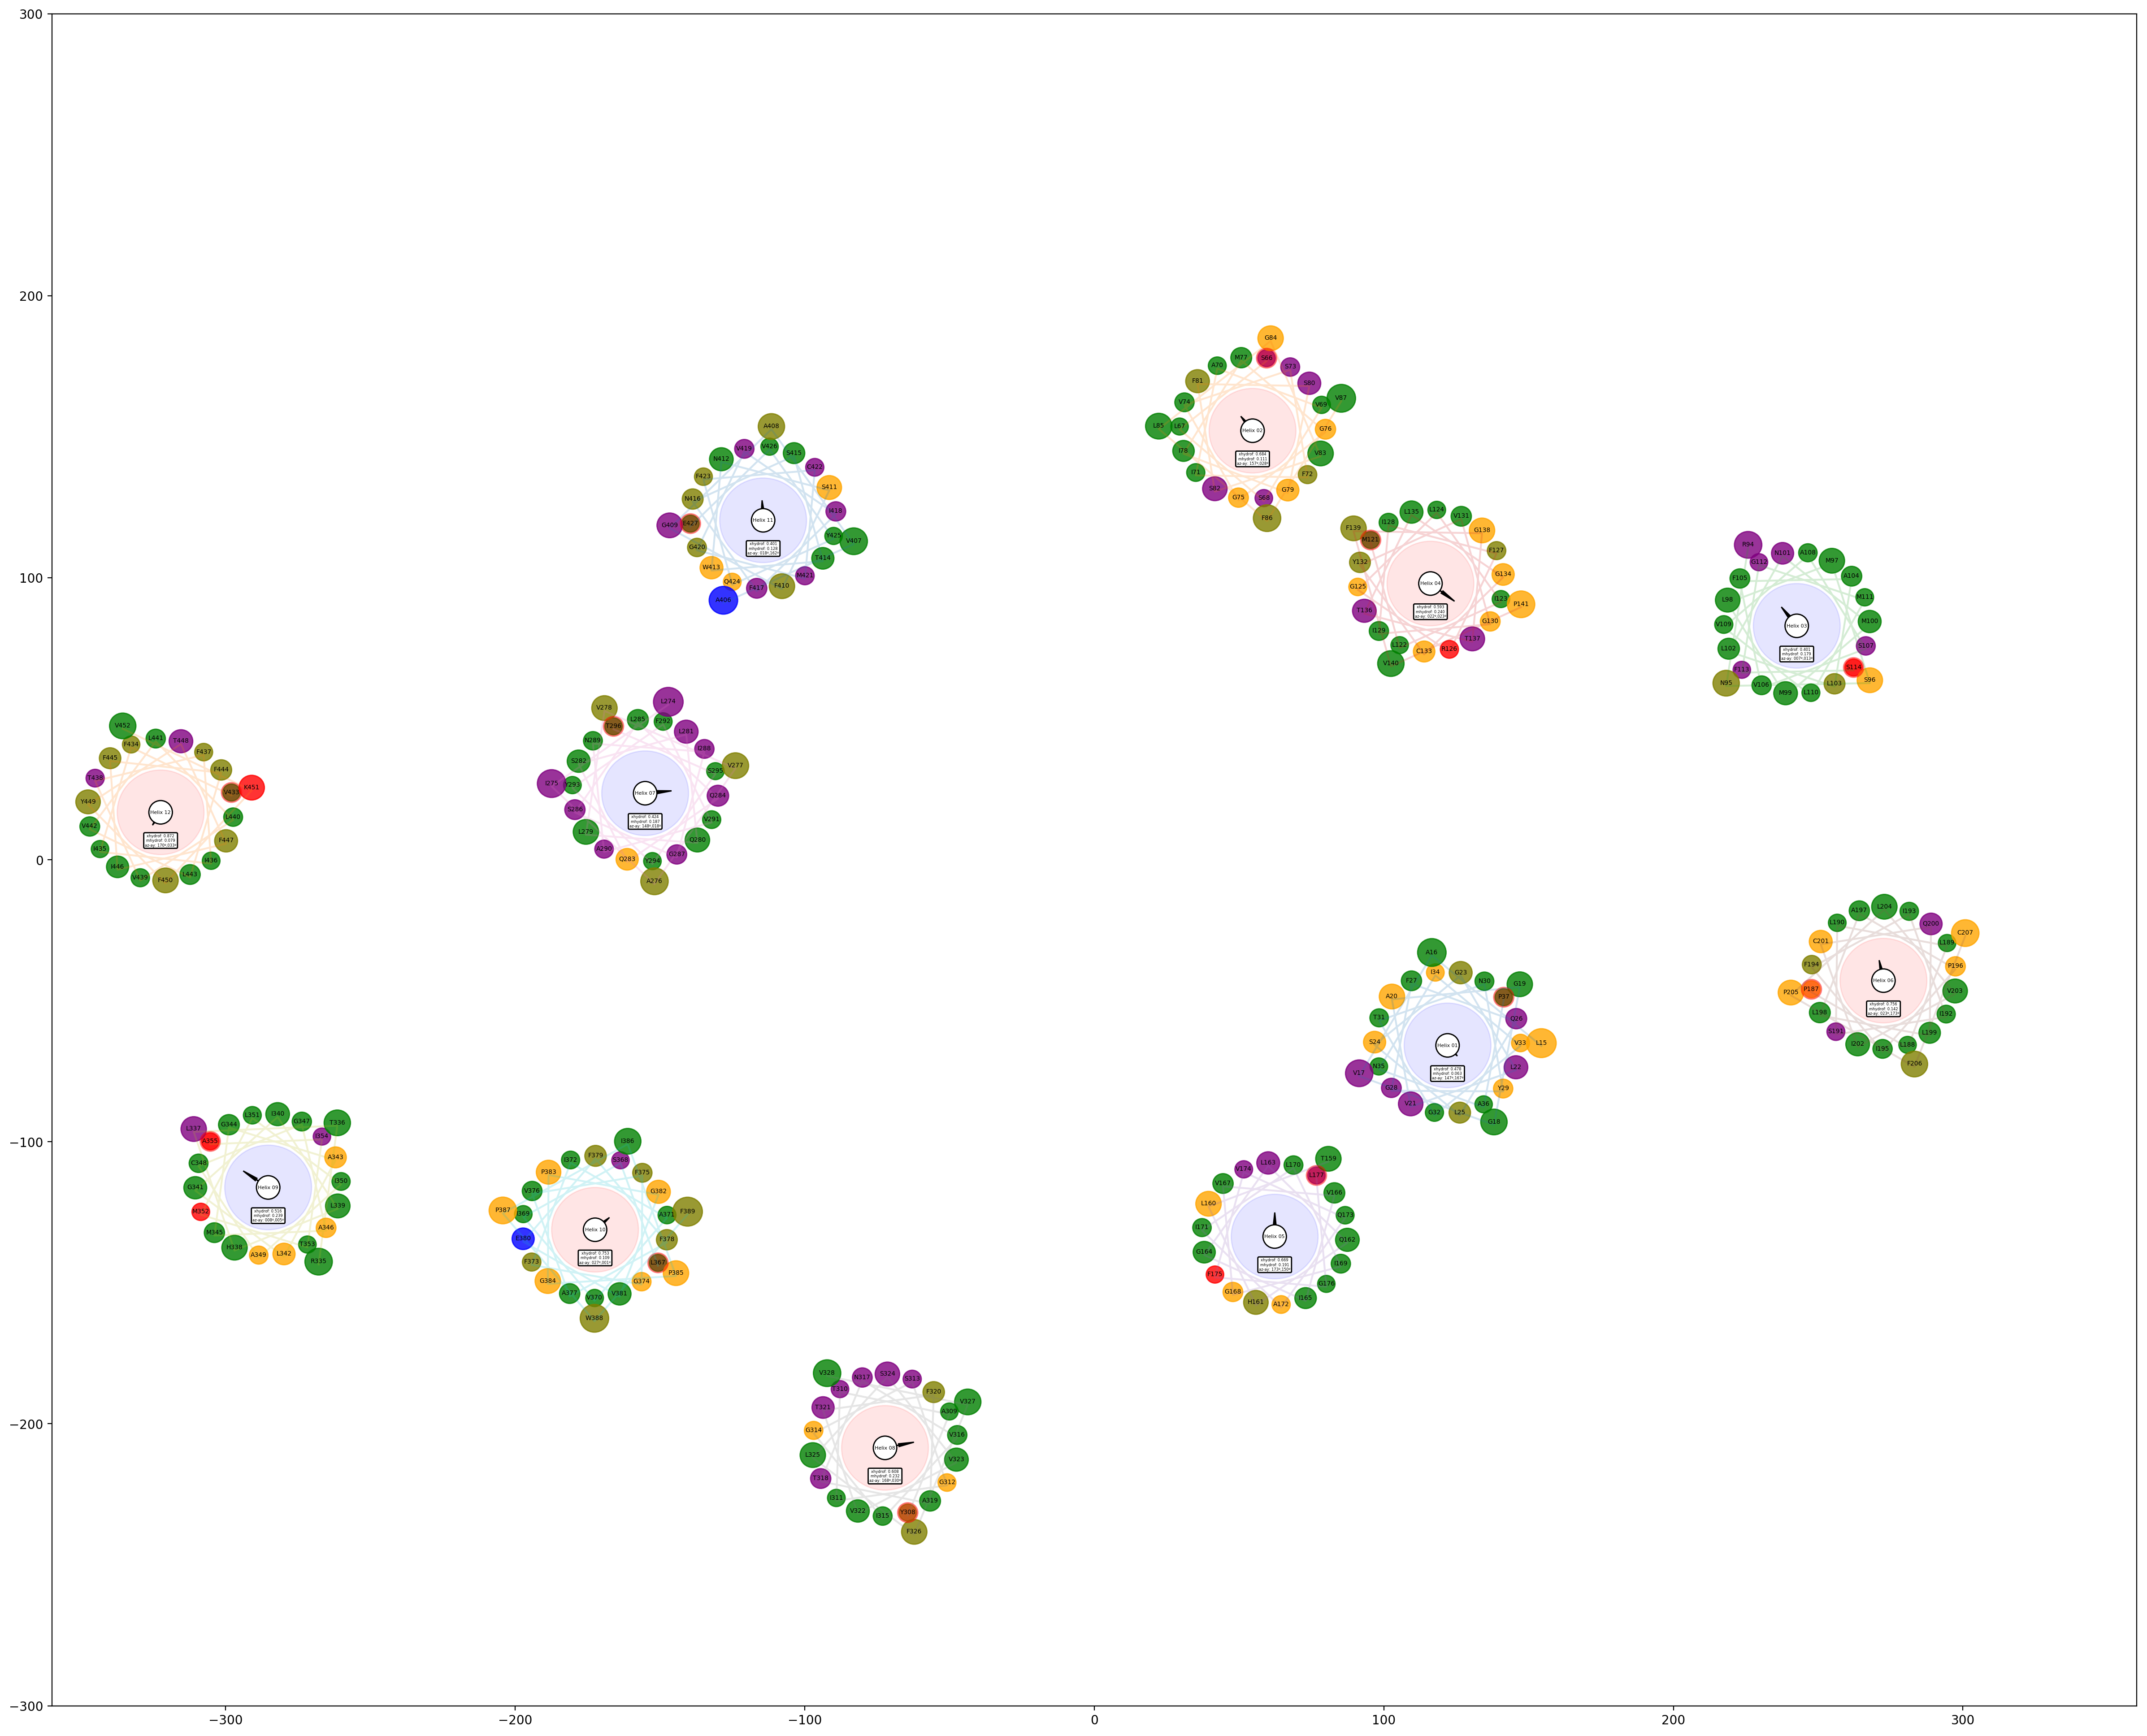

In [596]:
do_plots("4pyp")

In [410]:
import numpy as np
xy = (1,1)
print(np.arctan2(1,1))
print(np.arctan2(1,1)*180/np.pi)

0.785398163397
45.0


In [195]:
# Move coord with numpy
def move(xyz, M):
    import numpy as np
    new_xyz = []
    matrix = np.matrix(M)
    for vec in xyz:
        vec = np.append(vec,[1])
        nxyz = M.dot(vec)
        new_xyz.append(nxyz[:-1])
    return np.array(new_xyz)

def unit_vector(data, axis=None, out=None):
    """Return ndarray normalized by length, i.e. Euclidean norm, along axis.
    """
    import numpy
    if out is None:
        data = numpy.array(data, dtype=numpy.float64, copy=True)
        if data.ndim == 1:
            data /= numpy.sqrt(numpy.dot(data, data))
            return data
    else:
        if out is not data:
            out[:] = numpy.array(data, copy=False)
        data = out
    length = numpy.atleast_1d(numpy.sum(data*data, axis))
    numpy.sqrt(length, length)
    if axis is not None:
        length = numpy.expand_dims(length, axis)
    data /= length
    if out is None:
        return data

def plot_vector(xyz, I):
    import matplotlib.pyplot as plt
    import numpy as np
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    centroide = [np.average(x),np.average(y),np.average(z)]
    ax2.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2])
    color = ["red","blue","magenta"]
    for i,vector in enumerate(I):
        ax2.quiver(centroide[0],centroide[1],centroide[2],
                  vector[0],vector[1],vector[2], length=10, color=color[i])
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    plt.show()
    
def sel_com(xyz, masses):
    m = masses
    totalm = comx = comy = comz = 0
    for i,coord in enumerate(xyz):
        mm = np.abs(m[i])
        comx += coord[0]*mm
        comy += coord[1]*mm
        comz += coord[2]*mm
        totalm += mm
    
    comx /= totalm
    comy /= totalm
    comz /= totalm
    print("Total weight: %4.2f" % totalm)
    COM = (comx, comy, comz)
    print (COM)
    return COM

def sel_it(xyz, COM, masses):
    import numpy
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    m = masses
    # compute I
    Ixx = 0
    Ixy = 0
    Ixz = 0
    Iyy = 0
    Iyz = 0
    Izz = 0
        
    for i,coord in enumerate(xyz):
        mm = m[i]
        xx, yy, zz = coord[0], coord[1], coord[2]
        # subtract the COM
        xx -= COM[0]
        yy -= COM[1]
        zz -= COM[2]

        Ixx += mm * (yy **2 + zz **2)
        Ixy -= mm * (xx * yy)
        Ixz -= mm * (xx * zz)
        Iyy += mm * (xx **2 + zz **2)
        Iyz -= mm * yy * zz
        Izz += mm * (xx **2 + yy **2)
        
    tensor = numpy.array([[Ixx, Ixy, Ixz],
                          [Ixy, Iyy, Iyz],
                          [Ixz, Iyz, Izz]])
    
    print (tensor)
    return tensor

def calc_principalaxes(xyz, masses):
    import numpy
    print("Calculating principal axes.")
    print("Getting the center-of-mass...")
    # get the COM
    COM = sel_com(xyz, masses)
    print("Computing the inertia tensor...")
    # get the I
    tensor = sel_it(xyz, COM, masses)
    print("Drawing the principal components...")
    # now $I holds in its columns the principal axes
    e_values, e_vectors = numpy.linalg.eig(tensor[:])
    axe1 = e_vectors[:,2]
    axe2 = e_vectors[:,1]
    axe3 = e_vectors[:,0]
    
    print (np.array([axe1,axe2,axe3]))
    return np.array([axe1,axe2,axe3])

def rotation_matrix(angle, direction, point=None):
    """Return matrix to rotate about axis defined by point and direction."""
    import numpy
    sina = numpy.sin(angle)
    cosa = numpy.cos(angle)
    direction = unit_vector(direction[:3])
    # rotation matrix around unit vector
    R = numpy.diag([cosa, cosa, cosa])
    R += numpy.outer(direction, direction) * (1.0 - cosa)
    direction *= sina
    R += numpy.array([[ 0.0,         -direction[2],  direction[1]],
                      [ direction[2], 0.0,          -direction[0]],
                      [-direction[1], direction[0],  0.0]])
    M = numpy.identity(4)
    M[:3, :3] = R
    if point is not None:
        # rotation not around origin
        point = numpy.array(point[:3], dtype=numpy.float64, copy=False)
        M[:3, 3] = point - numpy.dot(R, point)
        
    print (M)
    return M

def orient(xyz, masses, vector1, vector2):
    import numpy as np
    #COM = np.average(xyz[:,0]), np.average(xyz[:,1]), np.average(xyz[:,2])
    COM = sel_com(xyz, masses)
    vec1 = vector1/np.linalg.norm(vector1)
    print (vec1)
    vec2 = vector2/np.linalg.norm(vector2)
    print (vec2)
    rotvec = np.cross(vec1, vec2)
    sine   = np.linalg.norm(rotvec)
    cosine = np.dot(vec1,vec2)
    angle  = np.arctan2(sine,cosine)
    dangle  = np.degrees(angle)
    print ("Angulo de rot (rad):", angle)
    print ("Angulo de rot (deg):", dangle)
    """print ("center mass:",COM)
    print ("rotation vec:", rotvec)
    print ("sine:",sine)
    print ("cosine:",cosine)
    print ("angle (rad):",angle)"""
    
    # return the rotation matrix
    M = rotation_matrix(angle, rotvec, point=COM)
    return M, dangle
    #return [trans center $COM axis $rotvec $angle rad]

In [60]:
!wget http://pdbtm.enzim.hu/data/pdbtmall

--2017-11-17 23:39:43--  http://pdbtm.enzim.hu/data/pdbtmall
Resolving pdbtm.enzim.hu... 193.224.105.66
Connecting to pdbtm.enzim.hu|193.224.105.66|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23242470 (22M)
Saving to: 'pdbtmall'

pdbtmall            100%[===================>]  22.17M   516KB/s    in 37s     

2017-11-17 23:40:21 (618 KB/s) - 'pdbtmall' saved [23242470/23242470]

